# Distance Metrics
by: Team Old Nation

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import pairwise_distances
import sympy as sym
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
# Reading in csv
df = pd.read_csv("2022_Project_distance_Matrix.csv")
df

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
0,7,4,9,8,3,0,6,2,5,1
1,0,1,3,2,4,8,6,5,7,9
2,3,2,1,6,0,8,5,4,7,9
3,8,7,3,9,4,5,0,6,1,2
4,0,2,1,8,7,3,9,6,4,5
5,3,2,0,6,9,7,8,4,1,5
6,3,4,2,9,8,6,0,5,7,1
7,1,2,5,3,0,6,9,7,8,4
8,6,1,0,5,2,9,4,3,7,8
9,3,1,2,6,0,8,9,4,5,7


In [28]:
temp = np.zeros([10,10])
for i in range(len(df.columns)):
    col1 = df.columns[i]
    for j in range(len(df.columns)):
        col2 = df.columns[j]
        temp[i][j] = np.sum(df[df[col1]==0][col2])/len(df[df[col1]==0][col2])
            
data = pd.DataFrame(temp, columns=df.columns)
data = data.set_index(data.columns)
data.head()

,ARFL,Argonne,Boeing,Delta Dental,Ford,Hope Village,Kellogg's,Neogen,Old Nation,Qside
ARFL,0.000000,3.000000,3.000000,5.200000,4.000000,6.200000,6.600000,4.000000,5.600000,7.400000
Argonne,2.666667,0.000000,1.666667,3.333333,6.666667,5.333333,8.000000,6.000000,5.000000,6.333333
Boeing,3.200000,2.600000,0.000000,6.200000,4.600000,8.000000,5.600000,2.600000,5.800000,6.400000
Delta Dental,1.666667,7.333333,6.000000,0.000000,6.666667,5.333333,7.333333,4.000000,3.000000,3.666667
Ford,2.500000,2.500000,2.833333,5.666667,0.000000,7.666667,6.166667,3.833333,6.833333,7.000000


In [29]:
data_dist = sym.Matrix(pairwise_distances(data))
data_dist[3,3] = 0.0 #this was essentially 0 but rounding errors made it larger
data_dist

Matrix([
[2.38418579101563e-7, 6.05750223552029,    5.29150262212918, 9.31092548210614, 5.17622771266232,    12.7561749752816, 11.4282301536347,  6.8818602136341, 12.5153905252693, 12.2784363825367],
[   6.05750223552029,              0.0,    6.88379740162846, 10.0111049451208, 8.65062618157399,    12.4867930230304, 12.6051136007927, 8.61523198888006, 12.3237575438662, 11.0453610171873],
[   5.29150262212918, 6.88379740162846, 2.38418579101563e-7, 11.4391141848193, 5.77523448297412,    13.4610549363711, 10.5560935535411,  6.2010751755912, 13.3676849154968, 13.4208792558461],
[   9.31092548210614, 10.0111049451208,    11.4391141848193,              0.0, 11.9698695806503,    10.4076894650062, 11.9536140513607,  9.5102284117914, 9.72325391351407,  10.816653826392],
[   5.17622771266232, 8.65062618157399,    5.77523448297412, 11.9698695806503,              0.0,    14.4090249496626, 12.4922198009623, 8.56024402559751, 14.0904814206849, 14.5143607047182],
[   12.7561749752816, 12.48679302303

<AxesSubplot:>

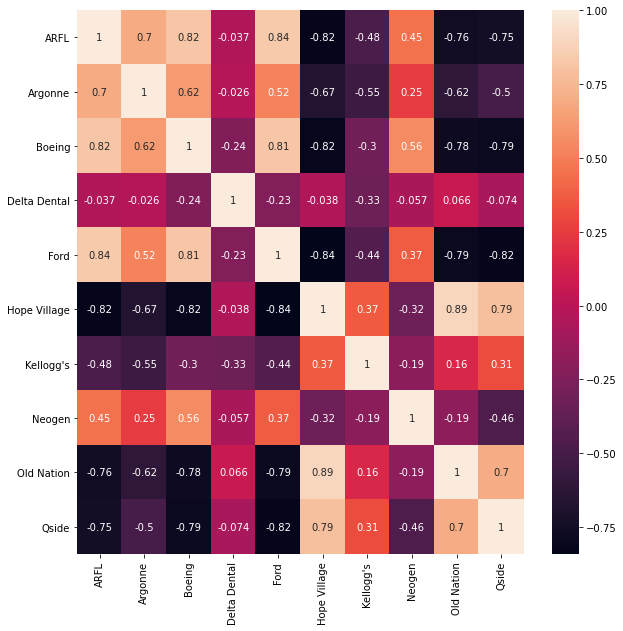

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(np.corrcoef(pairwise_distances(data)), annot=True, xticklabels=list(data.columns), yticklabels=list(data.columns))

Based on the distance matrix and correlation plot our project is most similar to Hope Village. Our project is most different from Ford and Boeing. Ford and Boeing are doing Image analysis of some sort, along with heavy machine learning. We, on the other hand, are using census data to learn more about the demographics of Old Nations Customer Base. Hope Village has a very similar project, as they are also working with census data along with housing data. 